In [1]:
import sys
sys.path.append("../")

import numpy as np
import pandas as pd
import pprint
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from kats.consts import TimeSeriesData
from statsmodels.tsa.seasonal import STL
from kats.utils.simulator import Simulator
from sklearn.preprocessing import StandardScaler
from kats.tsfeatures.tsfeatures import TsFeatures

import warnings
warnings.simplefilter(action='ignore')

In [2]:
sim = Simulator(n=90, freq="D", start = "2021-01-01") # simulate 90 days of data
random_seed = 100

# generate 10 TimeSeriesData with arima_sim
np.random.seed(random_seed) # setting numpy seed
arima_sim_list = [sim.arima_sim(ar=[0.1, 0.05], ma = [0.04, 0.1], d = 1) for _ in range(10)]

# generate 10 TimeSeriesData with trend shifts
trend_sim_list = [
    sim.trend_shift_sim(
        cp_arr = [30, 60, 75],
        trend_arr=[3, 15, 2, 8],
        intercept=30,
        noise=50,
        seasonal_period=7,
        seasonal_magnitude=np.random.uniform(10, 100),
        random_seed=random_seed
    ) for _ in range(10)
]


# generate 10 TimeSeriesData with level shifts
level_shift_list = [
    sim.level_shift_sim(
        cp_arr = [30, 60, 75],
        level_arr=[1.35, 1.05, 1.35, 1.2],
        noise=0.05,
        seasonal_period=7,
        seasonal_magnitude=np.random.uniform(0.1, 1.0),
        random_seed=random_seed
    ) for _ in range(10)
]

ts_list = arima_sim_list + trend_sim_list + level_shift_list

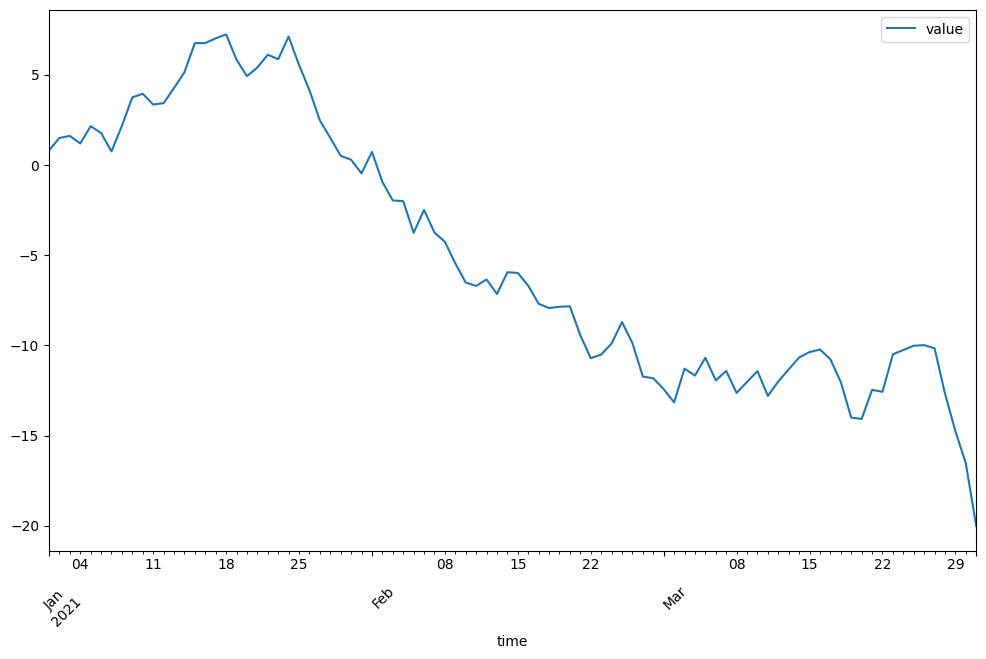

In [3]:
ts = ts_list[0]

# plot the time series
ts.plot(cols=['value'])
plt.xticks(rotation = 45)
plt.show()